# Homework Clustering

### Kodchakarn Chatupongtrakul 6030801021

## Import data

In [480]:
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

In [654]:
firedata = pd.read_csv('C:/Users/Asus/Desktop/Fire_Data.csv')

In [655]:
firedata.head(5)

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,1/12/2019 0:00,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,1/12/2019 0:00,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,1/12/2019 0:00,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,1/12/2019 0:00,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,1/12/2019 0:00,635,N,VIIRS,n,1,303.9,3.1,0


In [656]:
firedata.dtypes #ดูชนิดข้อมูล

OBJECTID        int64
LATITUDE      float64
LONGITUDE     float64
BRIGHT_TI4    float64
SCAN          float64
TRACK         float64
ACQ_DATE       object
ACQ_TIME        int64
SATELLITE      object
INSTRUMENT     object
CONFIDENCE     object
VERSION         int64
BRIGHT_TI5    float64
FRP           float64
TYPE            int64
dtype: object

## Transform data

### จัดการ ACQ_TIME ในรูป hh:min:sec

In [657]:
firedata['ACQ_TIME'] = (firedata['ACQ_TIME']/100).astype(str)
firedata['ACQ_TIME']= firedata['ACQ_TIME'].str.replace('.',':',regex=True)+':00'

In [658]:
firedata['ACQ_TIME'].unique()

array(['6:35:00', '6:36:00', '19:06:00', '19:07:00', '6:17:00', '6:18:00',
       '18:47:00', '18:48:00', '5:58:00', '5:59:00', '18:28:00',
       '18:29:00', '5:4:00', '7:19:00', '7:2:00', '18:1:00', '19:5:00',
       '7:0:00', '7:01:00', '19:31:00', '6:41:00', '6:42:00', '6:43:00',
       '19:13:00', '6:23:00', '6:24:00', '18:54:00', '6:04:00', '6:05:00',
       '18:35:00', '18:36:00', '5:45:00', '5:46:00', '7:26:00', '7:27:00',
       '18:16:00', '19:56:00', '7:07:00', '7:08:00', '19:38:00',
       '6:48:00', '6:49:00', '19:19:00', '6:29:00', '6:3:00', '19:0:00',
       '19:01:00', '6:1:00', '6:11:00', '18:41:00', '18:42:00', '5:52:00',
       '18:22:00', '18:23:00', '5:33:00', '5:34:00', '7:13:00', '7:14:00',
       '19:44:00', '6:54:00', '6:55:00', '19:25:00', '19:26:00',
       '6:16:00', '19:51:00', '19:32:00', '19:12:00', '18:53:00',
       '18:34:00', '7:25:00', '18:15:00', '19:57:00', '5:51:00',
       '18:04:00', '19:43:00', '5:57:00', '7:38:00', '5:39:00',
       '18:09:00'

### Combined date and time & ทำเป็น type datetime

In [659]:
firedata['ACQ_TIME'] = pd.to_timedelta(firedata['ACQ_TIME'])
firedata['DateTime'] = pd.to_datetime(firedata['ACQ_DATE'], format='%d/%m/%Y %H:%M') + firedata['ACQ_TIME']

In [660]:
firedata['DateTime']

0       2019-12-01 06:35:00
1       2019-12-01 06:35:00
2       2019-12-01 06:35:00
3       2019-12-01 06:35:00
4       2019-12-01 06:35:00
                ...        
79229   2020-04-04 20:03:00
79230   2020-04-04 20:03:00
79231   2020-04-04 20:03:00
79232   2020-04-04 20:03:00
79233   2020-04-04 20:03:00
Name: DateTime, Length: 79234, dtype: datetime64[ns]

In [661]:
firedata.dtypes

OBJECTID                int64
LATITUDE              float64
LONGITUDE             float64
BRIGHT_TI4            float64
SCAN                  float64
TRACK                 float64
ACQ_DATE               object
ACQ_TIME      timedelta64[ns]
SATELLITE              object
INSTRUMENT             object
CONFIDENCE             object
VERSION                 int64
BRIGHT_TI5            float64
FRP                   float64
TYPE                    int64
DateTime       datetime64[ns]
dtype: object

In [662]:
firedata

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,DateTime
0,1,16.33696,98.70137,334.5,0.39,0.36,1/12/2019 0:00,0 days 06:35:00,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00
1,2,16.48906,98.73961,343.2,0.39,0.36,1/12/2019 0:00,0 days 06:35:00,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00
2,3,16.93571,99.06874,339.4,0.39,0.36,1/12/2019 0:00,0 days 06:35:00,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00
3,4,16.54092,98.59869,343.2,0.39,0.36,1/12/2019 0:00,0 days 06:35:00,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00
4,5,16.87473,98.63222,331.1,0.39,0.36,1/12/2019 0:00,0 days 06:35:00,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,4/4/2020 0:00,0 days 20:03:00,N,VIIRS,n,1,294.4,7.2,0,2020-04-04 20:03:00
79230,79231,17.77545,97.85637,306.5,0.79,0.78,4/4/2020 0:00,0 days 20:03:00,N,VIIRS,n,1,293.7,2.9,0,2020-04-04 20:03:00
79231,79232,17.76847,97.79116,305.7,0.79,0.78,4/4/2020 0:00,0 days 20:03:00,N,VIIRS,n,1,293.7,2.2,0,2020-04-04 20:03:00
79232,79233,17.77518,97.82606,306.1,0.79,0.78,4/4/2020 0:00,0 days 20:03:00,N,VIIRS,n,1,292.7,2.9,0,2020-04-04 20:03:00


### Show data 7 days

In [663]:
firedata[firedata['DateTime'] <= (firedata['DateTime'].iloc[0]+pd.Timedelta(days=7))]

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,DateTime
0,1,16.33696,98.70137,334.5,0.39,0.36,1/12/2019 0:00,0 days 06:35:00,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00
1,2,16.48906,98.73961,343.2,0.39,0.36,1/12/2019 0:00,0 days 06:35:00,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00
2,3,16.93571,99.06874,339.4,0.39,0.36,1/12/2019 0:00,0 days 06:35:00,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00
3,4,16.54092,98.59869,343.2,0.39,0.36,1/12/2019 0:00,0 days 06:35:00,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00
4,5,16.87473,98.63222,331.1,0.39,0.36,1/12/2019 0:00,0 days 06:35:00,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,809,20.10502,100.32304,339.4,0.45,0.47,8/12/2019 0:00,0 days 06:05:00,N,VIIRS,n,1,298.2,8.0,0,2019-12-08 06:05:00
809,810,20.10838,100.32633,344.4,0.45,0.47,8/12/2019 0:00,0 days 06:05:00,N,VIIRS,n,1,298.2,7.6,0,2019-12-08 06:05:00
810,811,20.03892,99.95753,339.8,0.48,0.48,8/12/2019 0:00,0 days 06:05:00,N,VIIRS,n,1,299.3,5.2,0,2019-12-08 06:05:00
811,812,19.15931,100.04431,341.4,0.49,0.49,8/12/2019 0:00,0 days 06:05:00,N,VIIRS,n,1,299.0,6.7,0,2019-12-08 06:05:00


# Plot

### หาผลต่างของเวลาเพื่อใช้ในการ Plot

In [665]:
firedata['delta']=firedata['DateTime']-firedata['DateTime'].iloc[0]
firedata['delh']=(firedata['delta'].dt.total_seconds())/3600
firedata

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,DateTime,delta,deld,delh
0,1,16.33696,98.70137,334.5,0.39,0.36,1/12/2019 0:00,0 days 06:35:00,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.000000,0.000000
1,2,16.48906,98.73961,343.2,0.39,0.36,1/12/2019 0:00,0 days 06:35:00,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00,0 days 00:00:00,0.000000,0.000000
2,3,16.93571,99.06874,339.4,0.39,0.36,1/12/2019 0:00,0 days 06:35:00,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.000000,0.000000
3,4,16.54092,98.59869,343.2,0.39,0.36,1/12/2019 0:00,0 days 06:35:00,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00,0 days 00:00:00,0.000000,0.000000
4,5,16.87473,98.63222,331.1,0.39,0.36,1/12/2019 0:00,0 days 06:35:00,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00,0 days 00:00:00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,4/4/2020 0:00,0 days 20:03:00,N,VIIRS,n,1,294.4,7.2,0,2020-04-04 20:03:00,125 days 13:28:00,3013.466667,3013.466667
79230,79231,17.77545,97.85637,306.5,0.79,0.78,4/4/2020 0:00,0 days 20:03:00,N,VIIRS,n,1,293.7,2.9,0,2020-04-04 20:03:00,125 days 13:28:00,3013.466667,3013.466667
79231,79232,17.76847,97.79116,305.7,0.79,0.78,4/4/2020 0:00,0 days 20:03:00,N,VIIRS,n,1,293.7,2.2,0,2020-04-04 20:03:00,125 days 13:28:00,3013.466667,3013.466667
79232,79233,17.77518,97.82606,306.1,0.79,0.78,4/4/2020 0:00,0 days 20:03:00,N,VIIRS,n,1,292.7,2.9,0,2020-04-04 20:03:00,125 days 13:28:00,3013.466667,3013.466667


### ทำตารางเก็บข้อมูล 7 วัน

In [666]:
seven = firedata[firedata['DateTime'] <= (firedata['DateTime'].iloc[0]+pd.Timedelta(days=7))]
seven

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,DateTime,delta,deld,delh
0,1,16.33696,98.70137,334.5,0.39,0.36,1/12/2019 0:00,0 days 06:35:00,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0,0.0
1,2,16.48906,98.73961,343.2,0.39,0.36,1/12/2019 0:00,0 days 06:35:00,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00,0 days 00:00:00,0.0,0.0
2,3,16.93571,99.06874,339.4,0.39,0.36,1/12/2019 0:00,0 days 06:35:00,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0,0.0
3,4,16.54092,98.59869,343.2,0.39,0.36,1/12/2019 0:00,0 days 06:35:00,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00,0 days 00:00:00,0.0,0.0
4,5,16.87473,98.63222,331.1,0.39,0.36,1/12/2019 0:00,0 days 06:35:00,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00,0 days 00:00:00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,809,20.10502,100.32304,339.4,0.45,0.47,8/12/2019 0:00,0 days 06:05:00,N,VIIRS,n,1,298.2,8.0,0,2019-12-08 06:05:00,6 days 23:30:00,167.5,167.5
809,810,20.10838,100.32633,344.4,0.45,0.47,8/12/2019 0:00,0 days 06:05:00,N,VIIRS,n,1,298.2,7.6,0,2019-12-08 06:05:00,6 days 23:30:00,167.5,167.5
810,811,20.03892,99.95753,339.8,0.48,0.48,8/12/2019 0:00,0 days 06:05:00,N,VIIRS,n,1,299.3,5.2,0,2019-12-08 06:05:00,6 days 23:30:00,167.5,167.5
811,812,19.15931,100.04431,341.4,0.49,0.49,8/12/2019 0:00,0 days 06:05:00,N,VIIRS,n,1,299.0,6.7,0,2019-12-08 06:05:00,6 days 23:30:00,167.5,167.5


In [667]:
sev = seven[['LONGITUDE','LATITUDE','delh']]
sev

,LONGITUDE,LATITUDE,delh
0,98.70137,16.33696,0.0
1,98.73961,16.48906,0.0
2,99.06874,16.93571,0.0
3,98.59869,16.54092,0.0
4,98.63222,16.87473,0.0
...,...,...,...
808,100.32304,20.10502,167.5
809,100.32633,20.10838,167.5
810,99.95753,20.03892,167.5
811,100.04431,19.15931,167.5


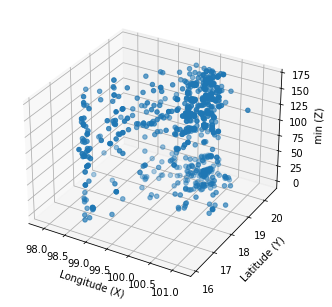

In [668]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
a = Axes3D(fig)
a.scatter(sev['LONGITUDE'], sev['LATITUDE'], sev['delh'])
a.set_xlabel('Longitude (X)')
a.set_ylabel('Latitude (Y)')
a.set_zlabel('min (Z)')
plt.show()

# DBSCAN technique

In [669]:
from sklearn.cluster import DBSCAN

In [670]:
dat = np.array(sev.values.tolist())
dat

array([[ 98.70137,  16.33696,   0.     ],
       [ 98.73961,  16.48906,   0.     ],
       [ 99.06874,  16.93571,   0.     ],
       ...,
       [ 99.95753,  20.03892, 167.5    ],
       [100.04431,  19.15931, 167.5    ],
       [100.0533 ,  19.58155, 167.5    ]])

In [683]:
db = DBSCAN(eps=2, min_samples=15).fit(dat)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dblabels = db.labels_
n_clusters_ = len(set(dblabels)) - (1 if -1 in dblabels else 0)
n_noise_ = list(dblabels).count(-1)

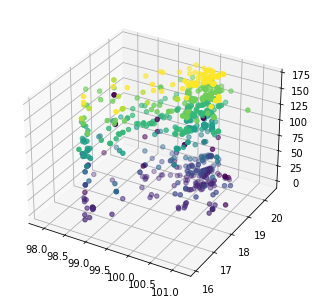

In [684]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(dat[:,0], dat[:,1], dat[:,2], c=dblabels, s=20)
plt.show()

In [685]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(dat, dblabels)
silhouette_avg

0.8816251035468456